# Скользящее среднее (Rolling mean)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pylab import rcParams
rcParams['figure.figsize'] = 14,6
from sklearn.preprocessing import StandardScaler
import stumpy
from matplotlib.patches import Rectangle
import numpy as np

In [14]:
#Будем использовать данные по курсу пары BTC-USD. 
#Источник данных https://www.kaggle.com/datasets/jessevent/all-crypto-currencies
btc_df = pd.read_csv('data/BTC-USD.csv', index_col=['timestamp'], parse_dates=['timestamp'])
# Удалим все столбцы, кроме "close"
btc_df.drop(['adjclose', 'open', 'high', 'volume', 'low'], axis= 1 , inplace= True)
btc_df['rolling_w_2'] = btc_df['close'].rolling(window=2).mean()
btc_df['rolling_w_10'] = btc_df['close'].rolling(window=10).mean()
btc_df['rolling_w_100'] = btc_df['close'].rolling(window=100).mean()

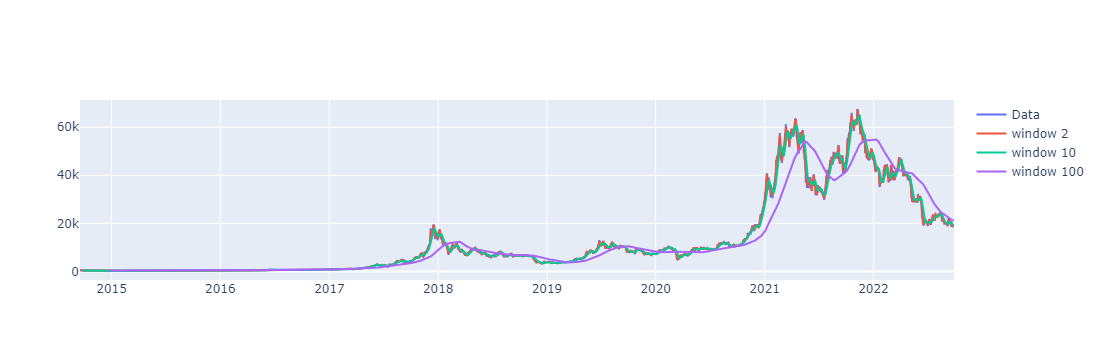

In [17]:
# Построим графики сглажиавния скользящим срдедним для разных значений window
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.02)
fig.add_trace(go.Scatter(x=btc_df.index, y=btc_df['close'], mode='lines', name='Data'),1,1)
fig.add_trace(go.Scatter(x=btc_df.index, y=btc_df['rolling_w_2'], mode='lines', name=f'window 2'),1,1)
fig.add_trace(go.Scatter(x=btc_df.index, y=btc_df['rolling_w_10'], mode='lines', name=f'window 10'),1,1)
fig.add_trace(go.Scatter(x=btc_df.index, y=btc_df['rolling_w_100'], mode='lines', name=f'window 100'),1,1)
fig.show()

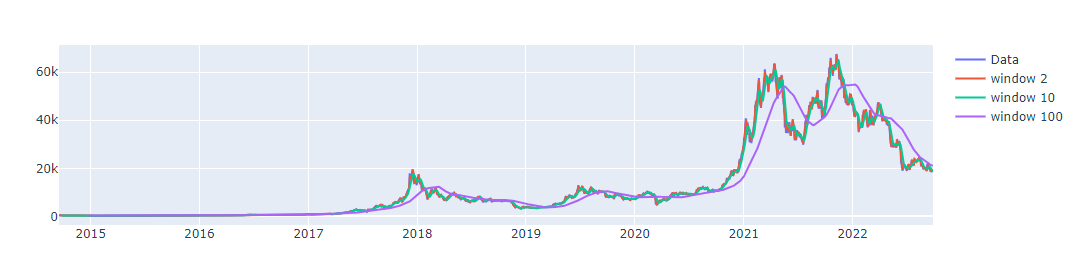